**Question 3) 
Is there a relationship between the severity of an accident and the time of day during which it occurs? Is there a significant difference between the severity of accidents that occur around midnight and those that occur around evening transit hours?**

**Import Libraries**

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Read Data**

In [9]:
from google.colab import files
uploaded = files.upload()

Saving US_Accidents_King_County.csv to US_Accidents_King_County.csv


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import io
df = pd.read_csv(io.BytesIO(uploaded['US_Accidents_King_County.csv']))

**Check counties with "King"**

In [12]:
df_temp = df[df['County'].str.contains('king', case = False)]
df_temp['County'].unique().tolist()

['King']

**Filtering dataset for King County**

In [13]:
df_king  = df.loc[df['County'] == 'King', :]
df_king.loc[:, 'year'] = df_king.loc[:, 'Start_Time'].apply(lambda x: x[:4])

**Converting start time of accident to hour into a new column**

In [15]:
df_king['Start_Time'] = pd.to_datetime(df_king['Start_Time'])
df_king['End_Time'] = pd.to_datetime(df_king['End_Time'])
df_king['hours'] = df_king['Start_Time'].dt.hour
df_king['hours'].value_counts()

17    1221
16    1153
15    1073
14     988
18     988
13     825
12     807
9      792
11     786
7      769
8      767
10     757
19     713
6      645
21     529
20     526
5      446
22     427
23     381
2      297
4      260
1      260
0      249
3      244
Name: hours, dtype: int64

**EDA of midnight hours (23, 0, 1) and office transit hours (17, 18, 19)**

<Axes: xlabel='hours', ylabel='Severity'>

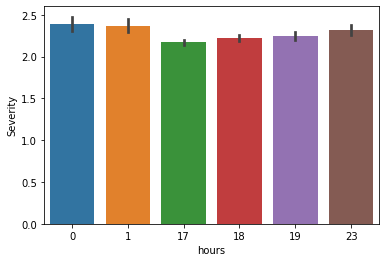

In [16]:
import seaborn as sns
df_king = df_king[(df_king['hours'] == 23) | (df_king['hours'] == 0) | (df_king['hours'] == 1)| (df_king['hours'] == 17) | (df_king['hours'] == 18) | (df_king['hours'] == 19) ]
df_king = df_king.sort_values('hours')
sns.barplot(data=df_king, x="hours", y="Severity")

**Creating new table with midnight hours**

In [17]:
Table_mid = df_king[['Severity','hours']]
Table_mid= Table_mid[(Table_mid['hours'] == 23) | (Table_mid['hours'] == 0) | (Table_mid['hours'] == 1) ]

**Creating new table with office transit hours**

In [18]:
Table_office = df_king[['Severity','hours']]
Table_office= Table_office[(Table_office['hours'] == 17) | (Table_office['hours'] == 18) | (Table_office['hours'] == 19) ]

**Performing t test**

In [19]:
from scipy.stats import ttest_ind
data1 = Table_mid['Severity'].tolist()
data2 = Table_office['Severity'].tolist()
stat, p = ttest_ind(data1, data2)
print(stat, p)
if p > 0.05:
 print('Probably the same distribution')
else:
 print('Probably different distributions')

6.422332655581534 1.507322897727276e-10
Probably different distributions


T- statistic value = 6.422 and P-value = 1.507e-10. We reject the null hypothesis since p-value is significantly less than 0.05 which is the significance level we have assumed for our testing. Interpretation: There is a statistically significant difference in the average severity of accidents which occur at midnight vs accidents which occur during office transit hours. From the confidence interval and point estimate value we observe that the severity of accidents is more during midnight hours. 

**Identifying confidence interval**

Confidence interval for midnight hours

In [22]:
import numpy as np
import scipy.stats as st
st.t.interval(alpha=0.90, df=len(data1)-1,
              loc=np.mean(data1),
              scale=st.sem(data1))

<ipython-input-22-514b2f22a7ef>:3: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  st.t.interval(alpha=0.90, df=len(data1)-1,


(2.314069755527759, 2.389301030989095)

Confidence interval for office transit hours

In [23]:
import numpy as np
import scipy.stats as st
st.t.interval(alpha=0.90, df=len(data2)-1,
              loc=np.mean(data2),
              scale=st.sem(data2))

<ipython-input-23-6c2cbc1e7a77>:3: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  st.t.interval(alpha=0.90, df=len(data2)-1,


(2.1909052930081057, 2.2245635639391903)

95% confidence interval for mean severity of midnight hours - (2.314069755527759, 2.389301030989095) and the point estimate is 2.35168. 95% confidence interval for mean severity of office transit hours - (2.1909052930081057, 2.2245635639391903) and the point estimate is 2.2077344

**Additiona EDA to determine the distribution of hours**

Text(0.5, 0, 'Midnight hours')

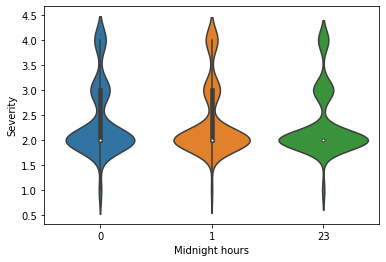

In [27]:
sns.violinplot(x ='hours', y = 'Severity', data = Table_mid )
plt.xlabel('Midnight hours')

Text(0.5, 0, 'Office transit hours')

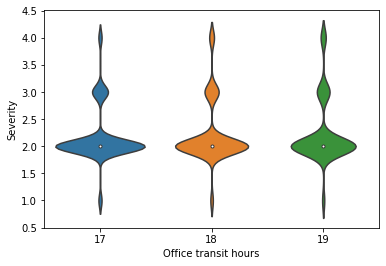

In [28]:
sns.violinplot(x ='hours', y = 'Severity', data = Table_office )
plt.xlabel('Office transit hours')